<a href="https://colab.research.google.com/github/revimathur1920/Earthquake_data_revi/blob/main/Finaldata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install obspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 108.9 MB/s eta 0:00:00


In [1]:
import matplotlib.pyplot as plt
from obspy import read
from obspy.core import UTCDateTime
from obspy.clients.fdsn import Client
import pandas as pd
import numpy as np
from obspy import read_inventory, read_events, UTCDateTime
from obspy.core.event import Catalog

In [2]:
import pandas as pd
client = Client("USGS")
start_date = UTCDateTime("2012-01-01")
end_date = UTCDateTime("2012-12-31")
min_magnitude = 3.5
max_magnitude = 9.5

# Retrieve earthquake data
catalog = client.get_events(starttime=start_date, endtime=end_date, minmagnitude=min_magnitude, maxmagnitude=max_magnitude)

# Initialize lists for storing data
magnitudes = []
dates = []

# Extract magnitudes and dates
for event in catalog:
    magnitude = event.magnitudes[0].mag
    date = UTCDateTime(event.origins[0].time)
    magnitudes.append(magnitude)
    dates.append(date)

# Calculate the number of earthquakes at each magnitude
num_eqs = []
magnitudes_unique = sorted(set(magnitudes))  # Unique magnitudes in ascending order
#magnitude_unique = pd.cut(magnitudes_unique, 6, right=True, ordered=True)
magnitude_unique = pd.cut(magnitudes_unique, bins=[3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5], include_lowest=True)
#inal_magnitude = sorted(set(magnitude_unique))
print(magnitude_unique)
for mag in magnitudes_unique:
    count = len([m for m in magnitudes if m==mag])
    num_eqs.append(count)

# Create a DataFrame
df = pd.DataFrame({'Magnitudes': magnitude_unique, 'Number_of_Earthquakes':num_eqs})
agg_functions = {'Number_of_Earthquakes': 'sum'}
df1 = df.groupby(df['Magnitudes']).aggregate(agg_functions)
df1.reset_index(level=0, inplace=True)
# Print the DataFrame
print(df1)

[(3.499, 4.0], (3.499, 4.0], (3.499, 4.0], (3.499, 4.0], (3.499, 4.0], ..., (7.5, 8.0], (7.5, 8.0], (7.5, 8.0], (8.0, 8.5], (8.5, 9.0]]
Length: 123
Categories (12, interval[float64, right]): [(3.499, 4.0] < (4.0, 4.5] < (4.5, 5.0] < (5.0, 5.5] < ... <
                                            (7.5, 8.0] < (8.0, 8.5] < (8.5, 9.0] < (9.0, 9.5]]
      Magnitudes  Number_of_Earthquakes
0   (3.499, 4.0]                   1595
1     (4.0, 4.5]                   5880
2     (4.5, 5.0]                   4480
3     (5.0, 5.5]                    922
4     (5.5, 6.0]                    244
5     (6.0, 6.5]                     69
6     (6.5, 7.0]                     21
7     (7.0, 7.5]                      9
8     (7.5, 8.0]                      4
9     (8.0, 8.5]                      1
10    (8.5, 9.0]                      1
11    (9.0, 9.5]                      0


In [3]:
import pandas as pd
client = Client("USGS")
start_date = UTCDateTime("2013-01-01")
end_date = UTCDateTime("2013-12-31")
min_magnitude = 3.5
max_magnitude = 9.5

# Retrieve earthquake data
catalog = client.get_events(starttime=start_date, endtime=end_date, minmagnitude=min_magnitude, maxmagnitude=max_magnitude)

# Initialize lists for storing data
magnitudes = []
dates = []

# Extract magnitudes and dates
for event in catalog:
    magnitude = event.magnitudes[0].mag
    date = UTCDateTime(event.origins[0].time)
    magnitudes.append(magnitude)
    dates.append(date)

# Calculate the number of earthquakes at each magnitude
num_eqs = []
magnitudes_unique = sorted(set(magnitudes))  # Unique magnitudes in ascending order
#magnitude_unique = pd.cut(magnitudes_unique, 6, right=True, ordered=True)
magnitude_unique = pd.cut(magnitudes_unique, bins=[3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5], include_lowest=True)
final_magnitude = sorted(set(magnitude_unique))
print(magnitude_unique)
for mag in magnitudes_unique:
    count = len([m for m in magnitudes if m==mag])
    num_eqs.append(count)

# Create a DataFrame
df = pd.DataFrame({'Magnitudes': magnitude_unique, 'Number_of_Earthquakes':num_eqs})
agg_functions = {'Number_of_Earthquakes': 'sum'}
df2 = df.groupby(df['Magnitudes']).aggregate(agg_functions)
df2.reset_index(level=0, inplace=True)
# Print the DataFrame
print(df2)

[(3.499, 4.0], (3.499, 4.0], (3.499, 4.0], (3.499, 4.0], (3.499, 4.0], ..., (7.0, 7.5], (7.0, 7.5], (7.5, 8.0], (7.5, 8.0], (8.0, 8.5]]
Length: 100
Categories (12, interval[float64, right]): [(3.499, 4.0] < (4.0, 4.5] < (4.5, 5.0] < (5.0, 5.5] < ... <
                                            (7.5, 8.0] < (8.0, 8.5] < (8.5, 9.0] < (9.0, 9.5]]
      Magnitudes  Number_of_Earthquakes
0   (3.499, 4.0]                   1554
1     (4.0, 4.5]                   6967
2     (4.5, 5.0]                   4381
3     (5.0, 5.5]                    863
4     (5.5, 6.0]                    232
5     (6.0, 6.5]                     65
6     (6.5, 7.0]                     29
7     (7.0, 7.5]                     10
8     (7.5, 8.0]                      4
9     (8.0, 8.5]                      1
10    (8.5, 9.0]                      0
11    (9.0, 9.5]                      0


In [4]:
import pandas as pd
client = Client("USGS")
start_date = UTCDateTime("2014-01-01")
end_date = UTCDateTime("2014-12-31")
min_magnitude = 3.5
max_magnitude = 9.5

# Retrieve earthquake data
catalog = client.get_events(starttime=start_date, endtime=end_date, minmagnitude=min_magnitude, maxmagnitude=max_magnitude)

# Initialize lists for storing data
magnitudes = []
dates = []

# Extract magnitudes and dates
for event in catalog:
    magnitude = event.magnitudes[0].mag
    date = UTCDateTime(event.origins[0].time)
    magnitudes.append(magnitude)
    dates.append(date)

# Calculate the number of earthquakes at each magnitude
num_eqs = []
magnitudes_unique = sorted(set(magnitudes))  # Unique magnitudes in ascending order
#magnitude_unique = pd.cut(magnitudes_unique, 6, right=True, ordered=True)
magnitude_unique = pd.cut(magnitudes_unique, bins=[3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5], include_lowest=True)
final_magnitude = sorted(set(magnitude_unique))
print(magnitude_unique)
for mag in magnitudes_unique:
    count = len([m for m in magnitudes if m==mag])
    num_eqs.append(count)

# Create a DataFrame
df = pd.DataFrame({'Magnitudes': magnitude_unique, 'Number_of_Earthquakes':num_eqs})
agg_functions = {'Number_of_Earthquakes': 'sum'}
df3 = df.groupby(df['Magnitudes']).aggregate(agg_functions)
df3.reset_index(level=0, inplace=True)
# Print the DataFrame
print(df3)

[(3.499, 4.0], (3.499, 4.0], (3.499, 4.0], (3.499, 4.0], (3.499, 4.0], ..., (7.0, 7.5], (7.5, 8.0], (7.5, 8.0], (7.5, 8.0], (8.0, 8.5]]
Length: 103
Categories (12, interval[float64, right]): [(3.499, 4.0] < (4.0, 4.5] < (4.5, 5.0] < (5.0, 5.5] < ... <
                                            (7.5, 8.0] < (8.0, 8.5] < (8.5, 9.0] < (9.0, 9.5]]
      Magnitudes  Number_of_Earthquakes
0   (3.499, 4.0]                   2185
1     (4.0, 4.5]                  10122
2     (4.5, 5.0]                   4870
3     (5.0, 5.5]                    954
4     (5.5, 6.0]                    268
5     (6.0, 6.5]                     84
6     (6.5, 7.0]                     28
7     (7.0, 7.5]                      7
8     (7.5, 8.0]                      3
9     (8.0, 8.5]                      1
10    (8.5, 9.0]                      0
11    (9.0, 9.5]                      0


In [5]:
import pandas as pd
client = Client("USGS")
start_date = UTCDateTime("2015-01-01")
end_date = UTCDateTime("2015-12-31")
min_magnitude = 3.5
max_magnitude = 9.5

# Retrieve earthquake data
catalog = client.get_events(starttime=start_date, endtime=end_date, minmagnitude=min_magnitude, maxmagnitude=max_magnitude)

# Initialize lists for storing data
magnitudes = []
dates = []

# Extract magnitudes and dates
for event in catalog:
    magnitude = event.magnitudes[0].mag
    date = UTCDateTime(event.origins[0].time)
    magnitudes.append(magnitude)
    dates.append(date)

# Calculate the number of earthquakes at each magnitude
num_eqs = []
magnitudes_unique = sorted(set(magnitudes))  # Unique magnitudes in ascending order
magnitude_unique = pd.cut(magnitudes_unique, bins=[3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5], include_lowest=True)
final_magnitude = sorted(set(magnitude_unique))
print(magnitude_unique)
for mag in magnitudes_unique:
    count = len([m for m in magnitudes if m==mag])
    num_eqs.append(count)

# Create a DataFrame
df = pd.DataFrame({'Magnitudes': magnitude_unique, 'Number_of_Earthquakes':num_eqs})
agg_functions = {'Number_of_Earthquakes': 'sum'}
df4 = df.groupby(df['Magnitudes']).aggregate(agg_functions)
df4.reset_index(level=0, inplace=True)
# Print the DataFrame
print(df4)

[(3.499, 4.0], (3.499, 4.0], (3.499, 4.0], (3.499, 4.0], (3.499, 4.0], ..., (7.0, 7.5], (7.0, 7.5], (7.5, 8.0], (7.5, 8.0], (8.0, 8.5]]
Length: 97
Categories (12, interval[float64, right]): [(3.499, 4.0] < (4.0, 4.5] < (4.5, 5.0] < (5.0, 5.5] < ... <
                                            (7.5, 8.0] < (8.0, 8.5] < (8.5, 9.0] < (9.0, 9.5]]
      Magnitudes  Number_of_Earthquakes
0   (3.499, 4.0]                   2153
1     (4.0, 4.5]                   8971
2     (4.5, 5.0]                   4098
3     (5.0, 5.5]                    862
4     (5.5, 6.0]                    244
5     (6.0, 6.5]                     65
6     (6.5, 7.0]                     34
7     (7.0, 7.5]                      9
8     (7.5, 8.0]                      4
9     (8.0, 8.5]                      1
10    (8.5, 9.0]                      0
11    (9.0, 9.5]                      0


In [7]:
import pandas as pd
client = Client("USGS")
start_date = UTCDateTime("2016-01-01")
end_date = UTCDateTime("2016-12-31")
min_magnitude = 3.5
max_magnitude = 9.5

# Retrieve earthquake data
catalog = client.get_events(starttime=start_date, endtime=end_date, minmagnitude=min_magnitude, maxmagnitude=max_magnitude)

# Initialize lists for storing data
magnitudes = []
dates = []

# Extract magnitudes and dates
for event in catalog:
    magnitude = event.magnitudes[0].mag
    date = UTCDateTime(event.origins[0].time)
    magnitudes.append(magnitude)
    dates.append(date)

# Calculate the number of earthquakes at each magnitude
num_eqs = []
magnitudes_unique = sorted(set(magnitudes))  # Unique magnitudes in ascending order
magnitude_unique = pd.cut(magnitudes_unique, bins=[3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5], include_lowest=True)
final_magnitude = sorted(set(magnitude_unique))
print(magnitude_unique)
for mag in magnitudes_unique:
    count = len([m for m in magnitudes if m==mag])
    num_eqs.append(count)

# Create a DataFrame
df = pd.DataFrame({'Magnitudes': magnitude_unique, 'Number_of_Earthquakes':num_eqs})
agg_functions = {'Number_of_Earthquakes': 'sum'}
df5 = df.groupby(df['Magnitudes']).aggregate(agg_functions)
df5.reset_index(level=0, inplace=True)
# Print the DataFrame
print(df5)

[(3.499, 4.0], (3.499, 4.0], (3.499, 4.0], (3.499, 4.0], (3.499, 4.0], ..., (7.0, 7.5], (7.5, 8.0], (7.5, 8.0], (7.5, 8.0], (7.5, 8.0]]
Length: 101
Categories (12, interval[float64, right]): [(3.499, 4.0] < (4.0, 4.5] < (4.5, 5.0] < (5.0, 5.5] < ... <
                                            (7.5, 8.0] < (8.0, 8.5] < (8.5, 9.0] < (9.0, 9.5]]
      Magnitudes  Number_of_Earthquakes
0   (3.499, 4.0]                   1944
1     (4.0, 4.5]                   9025
2     (4.5, 5.0]                   4232
3     (5.0, 5.5]                    911
4     (5.5, 6.0]                    258
5     (6.0, 6.5]                     76
6     (6.5, 7.0]                     28
7     (7.0, 7.5]                      6
8     (7.5, 8.0]                      7
9     (8.0, 8.5]                      0
10    (8.5, 9.0]                      0
11    (9.0, 9.5]                      0


In [8]:
import pandas as pd
client = Client("USGS")
start_date = UTCDateTime("2017-01-01")
end_date = UTCDateTime("2017-12-31")
min_magnitude = 3.5
max_magnitude = 9.5

# Retrieve earthquake data
catalog = client.get_events(starttime=start_date, endtime=end_date, minmagnitude=min_magnitude, maxmagnitude=max_magnitude)

# Initialize lists for storing data
magnitudes = []
dates = []

# Extract magnitudes and dates
for event in catalog:
    magnitude = event.magnitudes[0].mag
    date = UTCDateTime(event.origins[0].time)
    magnitudes.append(magnitude)
    dates.append(date)

# Calculate the number of earthquakes at each magnitude
num_eqs = []
magnitudes_unique = sorted(set(magnitudes))  # Unique magnitudes in ascending order
magnitude_unique = pd.cut(magnitudes_unique, bins=[3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5], include_lowest=True)
final_magnitude = sorted(set(magnitude_unique))
print(magnitude_unique)
for mag in magnitudes_unique:
    count = len([m for m in magnitudes if m==mag])
    num_eqs.append(count)

# Create a DataFrame
df = pd.DataFrame({'Magnitudes': magnitude_unique, 'Number_of_Earthquakes':num_eqs})
agg_functions = {'Number_of_Earthquakes': 'sum'}
df6 = df.groupby(df['Magnitudes']).aggregate(agg_functions)
df6.reset_index(level=0, inplace=True)
# Print the DataFrame
print(df6)

[(3.499, 4.0], (3.499, 4.0], (3.499, 4.0], (3.499, 4.0], (3.499, 4.0], ..., (7.0, 7.5], (7.0, 7.5], (7.5, 8.0], (7.5, 8.0], (8.0, 8.5]]
Length: 101
Categories (12, interval[float64, right]): [(3.499, 4.0] < (4.0, 4.5] < (4.5, 5.0] < (5.0, 5.5] < ... <
                                            (7.5, 8.0] < (8.0, 8.5] < (8.5, 9.0] < (9.0, 9.5]]
      Magnitudes  Number_of_Earthquakes
0   (3.499, 4.0]                   1914
1     (4.0, 4.5]                   7455
2     (4.5, 5.0]                   3676
3     (5.0, 5.5]                    862
4     (5.5, 6.0]                    213
5     (6.0, 6.5]                     61
6     (6.5, 7.0]                     20
7     (7.0, 7.5]                      3
8     (7.5, 8.0]                      2
9     (8.0, 8.5]                      1
10    (8.5, 9.0]                      0
11    (9.0, 9.5]                      0


In [9]:
import pandas as pd
client = Client("USGS")
start_date = UTCDateTime("2018-01-01")
end_date = UTCDateTime("2018-12-31")
min_magnitude = 3.5
max_magnitude = 9.5

# Retrieve earthquake data
catalog = client.get_events(starttime=start_date, endtime=end_date, minmagnitude=min_magnitude, maxmagnitude=max_magnitude)

# Initialize lists for storing data
magnitudes = []
dates = []

# Extract magnitudes and dates
for event in catalog:
    magnitude = event.magnitudes[0].mag
    date = UTCDateTime(event.origins[0].time)
    magnitudes.append(magnitude)
    dates.append(date)

# Calculate the number of earthquakes at each magnitude
num_eqs = []
magnitudes_unique = sorted(set(magnitudes))  # Unique magnitudes in ascending order
magnitude_unique = pd.cut(magnitudes_unique, bins=[3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5], include_lowest=True)
final_magnitude = sorted(set(magnitude_unique))
print(magnitude_unique)
for mag in magnitudes_unique:
    count = len([m for m in magnitudes if m==mag])
    num_eqs.append(count)

# Create a DataFrame
df = pd.DataFrame({'Magnitudes': magnitude_unique, 'Number_of_Earthquakes':num_eqs})
agg_functions = {'Number_of_Earthquakes': 'sum'}
df7 = df.groupby(df['Magnitudes']).aggregate(agg_functions)
df7.reset_index(level=0, inplace=True)
# Print the DataFrame
print(df7)

[(3.499, 4.0], (3.499, 4.0], (3.499, 4.0], (3.499, 4.0], (3.499, 4.0], ..., (7.0, 7.5], (7.0, 7.5], (7.0, 7.5], (7.5, 8.0], (8.0, 8.5]]
Length: 132
Categories (12, interval[float64, right]): [(3.499, 4.0] < (4.0, 4.5] < (4.5, 5.0] < (5.0, 5.5] < ... <
                                            (7.5, 8.0] < (8.0, 8.5] < (8.5, 9.0] < (9.0, 9.5]]
      Magnitudes  Number_of_Earthquakes
0   (3.499, 4.0]                   2597
1     (4.0, 4.5]                   8170
2     (4.5, 5.0]                   4306
3     (5.0, 5.5]                   1005
4     (5.5, 6.0]                    270
5     (6.0, 6.5]                     70
6     (6.5, 7.0]                     20
7     (7.0, 7.5]                     12
8     (7.5, 8.0]                      2
9     (8.0, 8.5]                      1
10    (8.5, 9.0]                      0
11    (9.0, 9.5]                      0


In [10]:
import pandas as pd
client = Client("USGS")
start_date = UTCDateTime("2019-01-01")
end_date = UTCDateTime("2019-12-31")
min_magnitude = 3.5
max_magnitude = 9.5

# Retrieve earthquake data
catalog = client.get_events(starttime=start_date, endtime=end_date, minmagnitude=min_magnitude, maxmagnitude=max_magnitude)

# Initialize lists for storing data
magnitudes = []
dates = []

# Extract magnitudes and dates
for event in catalog:
    magnitude = event.magnitudes[0].mag
    date = UTCDateTime(event.origins[0].time)
    magnitudes.append(magnitude)
    dates.append(date)

# Calculate the number of earthquakes at each magnitude
num_eqs = []
magnitudes_unique = sorted(set(magnitudes))  # Unique magnitudes in ascending order
magnitude_unique = pd.cut(magnitudes_unique, bins=[3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5], include_lowest=True)
final_magnitude = sorted(set(magnitude_unique))
print(magnitude_unique)
for mag in magnitudes_unique:
    count = len([m for m in magnitudes if m==mag])
    num_eqs.append(count)

# Create a DataFrame
df = pd.DataFrame({'Magnitudes': magnitude_unique, 'Number_of_Earthquakes':num_eqs})
agg_functions = {'Number_of_Earthquakes': 'sum'}
df8 = df.groupby(df['Magnitudes']).aggregate(agg_functions)
df8.reset_index(level=0, inplace=True)
# Print the DataFrame
print(df8)

[(3.499, 4.0], (3.499, 4.0], (3.499, 4.0], (3.499, 4.0], (3.499, 4.0], ..., (7.0, 7.5], (7.0, 7.5], (7.0, 7.5], (7.5, 8.0], (7.5, 8.0]]
Length: 158
Categories (12, interval[float64, right]): [(3.499, 4.0] < (4.0, 4.5] < (4.5, 5.0] < (5.0, 5.5] < ... <
                                            (7.5, 8.0] < (8.0, 8.5] < (8.5, 9.0] < (9.0, 9.5]]
      Magnitudes  Number_of_Earthquakes
0   (3.499, 4.0]                   1728
1     (4.0, 4.5]                   7522
2     (4.5, 5.0]                   4244
3     (5.0, 5.5]                    854
4     (5.5, 6.0]                    241
5     (6.0, 6.5]                     75
6     (6.5, 7.0]                     20
7     (7.0, 7.5]                      7
8     (7.5, 8.0]                      2
9     (8.0, 8.5]                      0
10    (8.5, 9.0]                      0
11    (9.0, 9.5]                      0


In [11]:
import pandas as pd
client = Client("USGS")
start_date = UTCDateTime("2020-01-01")
end_date = UTCDateTime("2020-12-31")
min_magnitude = 3.5
max_magnitude = 9.5

# Retrieve earthquake data
catalog = client.get_events(starttime=start_date, endtime=end_date, minmagnitude=min_magnitude, maxmagnitude=max_magnitude)

# Initialize lists for storing data
magnitudes = []
dates = []

# Extract magnitudes and dates
for event in catalog:
    magnitude = event.magnitudes[0].mag
    date = UTCDateTime(event.origins[0].time)
    magnitudes.append(magnitude)
    dates.append(date)

# Calculate the number of earthquakes at each magnitude
num_eqs = []
magnitudes_unique = sorted(set(magnitudes))  # Unique magnitudes in ascending order
magnitude_unique = pd.cut(magnitudes_unique, bins=[3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5], include_lowest=True)
final_magnitude = sorted(set(magnitude_unique))
print(magnitude_unique)
for mag in magnitudes_unique:
    count = len([m for m in magnitudes if m==mag])
    num_eqs.append(count)

# Create a DataFrame
df = pd.DataFrame({'Magnitudes': magnitude_unique, 'Number_of_Earthquakes':num_eqs})
agg_functions = {'Number_of_Earthquakes': 'sum'}
df9 = df.groupby(df['Magnitudes']).aggregate(agg_functions)
df9.reset_index(level=0, inplace=True)
# Print the DataFrame
print(df9)

[(3.499, 4.0], (3.499, 4.0], (3.499, 4.0], (3.499, 4.0], (3.499, 4.0], ..., (7.0, 7.5], (7.0, 7.5], (7.5, 8.0], (7.5, 8.0], (7.5, 8.0]]
Length: 137
Categories (12, interval[float64, right]): [(3.499, 4.0] < (4.0, 4.5] < (4.5, 5.0] < (5.0, 5.5] < ... <
                                            (7.5, 8.0] < (8.0, 8.5] < (8.5, 9.0] < (9.0, 9.5]]
      Magnitudes  Number_of_Earthquakes
0   (3.499, 4.0]                   2521
1     (4.0, 4.5]                   8357
2     (4.5, 5.0]                   3744
3     (5.0, 5.5]                    759
4     (5.5, 6.0]                    226
5     (6.0, 6.5]                     70
6     (6.5, 7.0]                     18
7     (7.0, 7.5]                      3
8     (7.5, 8.0]                      3
9     (8.0, 8.5]                      0
10    (8.5, 9.0]                      0
11    (9.0, 9.5]                      0


In [12]:
df_f = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9])
df_f.reset_index(level=0, inplace=True)
print(df_f)

     index    Magnitudes  Number_of_Earthquakes
0        0  (3.499, 4.0]                   1595
1        1    (4.0, 4.5]                   5880
2        2    (4.5, 5.0]                   4480
3        3    (5.0, 5.5]                    922
4        4    (5.5, 6.0]                    244
..     ...           ...                    ...
103      7    (7.0, 7.5]                      3
104      8    (7.5, 8.0]                      3
105      9    (8.0, 8.5]                      0
106     10    (8.5, 9.0]                      0
107     11    (9.0, 9.5]                      0

[108 rows x 3 columns]


In [13]:
agg_functions = {'Number_of_Earthquakes':'sum'}
df_fs = df_f.groupby(df_f['Magnitudes']).aggregate(agg_functions)
#df9.reset_index(level=0, inplace=True)
print(df_fs)

              Number_of_Earthquakes
Magnitudes                         
(3.499, 4.0]                  18191
(4.0, 4.5]                    72469
(4.5, 5.0]                    38031
(5.0, 5.5]                     7992
(5.5, 6.0]                     2196
(6.0, 6.5]                      635
(6.5, 7.0]                      218
(7.0, 7.5]                       66
(7.5, 8.0]                       31
(8.0, 8.5]                        6
(8.5, 9.0]                        1
(9.0, 9.5]                        0


In [14]:
df_fs['Log'] = np.log10(df_fs['Number_of_Earthquakes'])
#df_f = df_f.set_index('Magnitudes')
dfs = df_fs.drop(['Number_of_Earthquakes'], axis=1)
print(dfs)

                   Log
Magnitudes            
(3.499, 4.0]  4.259857
(4.0, 4.5]    4.860152
(4.5, 5.0]    4.580138
(5.0, 5.5]    3.902655
(5.5, 6.0]    3.341632
(6.0, 6.5]    2.802774
(6.5, 7.0]    2.338456
(7.0, 7.5]    1.819544
(7.5, 8.0]    1.491362
(8.0, 8.5]    0.778151
(8.5, 9.0]    0.000000
(9.0, 9.5]        -inf


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [15]:
df_fs.reset_index(level=0, inplace=True)

In [16]:
print(df_fs)

      Magnitudes  Number_of_Earthquakes       Log
0   (3.499, 4.0]                  18191  4.259857
1     (4.0, 4.5]                  72469  4.860152
2     (4.5, 5.0]                  38031  4.580138
3     (5.0, 5.5]                   7992  3.902655
4     (5.5, 6.0]                   2196  3.341632
5     (6.0, 6.5]                    635  2.802774
6     (6.5, 7.0]                    218  2.338456
7     (7.0, 7.5]                     66  1.819544
8     (7.5, 8.0]                     31  1.491362
9     (8.0, 8.5]                      6  0.778151
10    (8.5, 9.0]                      1  0.000000
11    (9.0, 9.5]                      0      -inf


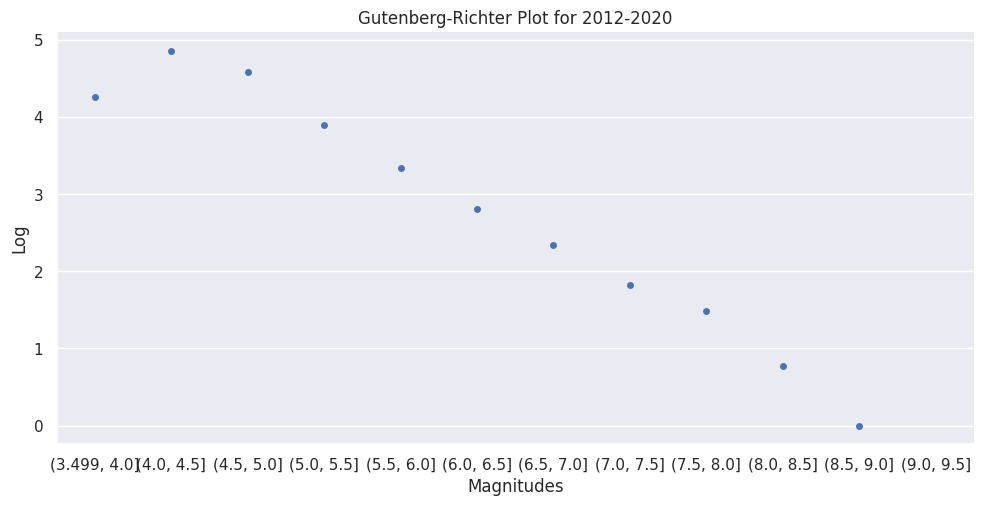

In [32]:
import seaborn as sns
#sns.set(rc={'figure.figsize':(100,50)})
sns.catplot(x="Magnitudes", y="Log", kind="swarm", data=df_fs, height=5, aspect=2)
plt.title("Gutenberg-Richter Plot for 2012-2020")
plt.show()

In [33]:
separate_dataframes = [df1, df2, df3, df4, df5, df6, df7, df8, df9]

In [34]:
separate_dataframes

[      Magnitudes  Number_of_Earthquakes
 0   (3.499, 4.0]                   1595
 1     (4.0, 4.5]                   5880
 2     (4.5, 5.0]                   4480
 3     (5.0, 5.5]                    922
 4     (5.5, 6.0]                    244
 5     (6.0, 6.5]                     69
 6     (6.5, 7.0]                     21
 7     (7.0, 7.5]                      9
 8     (7.5, 8.0]                      4
 9     (8.0, 8.5]                      1
 10    (8.5, 9.0]                      1
 11    (9.0, 9.5]                      0,
       Magnitudes  Number_of_Earthquakes
 0   (3.499, 4.0]                   1554
 1     (4.0, 4.5]                   6967
 2     (4.5, 5.0]                   4381
 3     (5.0, 5.5]                    863
 4     (5.5, 6.0]                    232
 5     (6.0, 6.5]                     65
 6     (6.5, 7.0]                     29
 7     (7.0, 7.5]                     10
 8     (7.5, 8.0]                      4
 9     (8.0, 8.5]                      1
 10    (8.5, 9.

In [35]:
df = np.zeros([108,2])

In [36]:
year = 2011
col = 0
for i in range(9):
  year+=1
  for j in range(12):
    #df[col][0] = separate_dataframes[i]['Magnitudes'][j]
    df[col][0] = year
    df[col][1] = separate_dataframes[i]['Number_of_Earthquakes'][j]
    col+=1

In [37]:
magnitudes = df_f['Magnitudes']

In [39]:
df = pd.DataFrame(df,columns = ['Year','Num_of_Earthquakes'])
df['Magnitude']= magnitudes
print(df)

       Year  Num_of_Earthquakes     Magnitude
0    2012.0              1595.0  (3.499, 4.0]
1    2012.0              5880.0    (4.0, 4.5]
2    2012.0              4480.0    (4.5, 5.0]
3    2012.0               922.0    (5.0, 5.5]
4    2012.0               244.0    (5.5, 6.0]
..      ...                 ...           ...
103  2020.0                 3.0    (7.0, 7.5]
104  2020.0                 3.0    (7.5, 8.0]
105  2020.0                 0.0    (8.0, 8.5]
106  2020.0                 0.0    (8.5, 9.0]
107  2020.0                 0.0    (9.0, 9.5]

[108 rows x 3 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

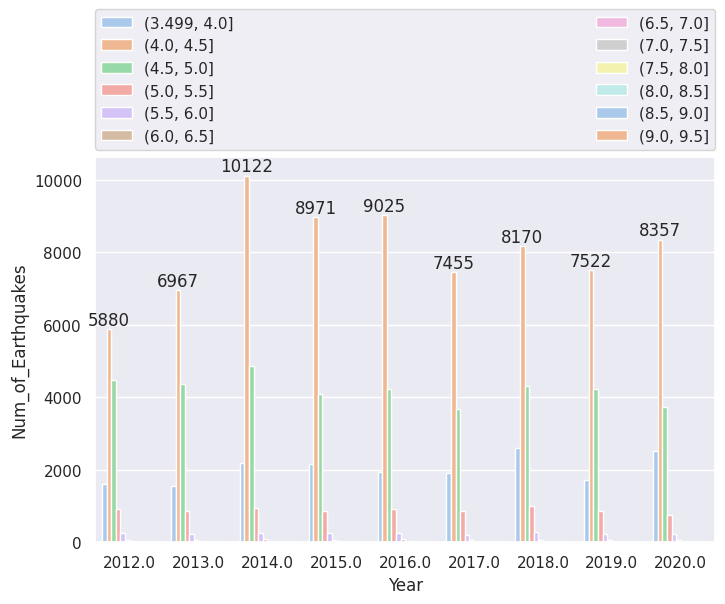

In [41]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(ax=ax, data=df, x='Year', y='Num_of_Earthquakes', hue = 'Magnitude', palette = 'pastel')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
                      ncols=2, mode="expand", borderaxespad=0.)
ax.bar_label(ax.containers[1])
plt.show